<a target="_blank" href="https://colab.research.google.com/github/zaryanezrya/notes/blob/master/smooth_nn_intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Очень плавное введение в нейронные сети

Это ранняя версия, WIP. Если находите ошибки, то открывайте issues

In [ ]:
%%capture
%pip install numpy matplotlib

# Часть 1. Оптимизация и градиентный спуск

Путь дана функция: $$F(x) = (10-x)^2$$

Отобразим её на графике:

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

def F(x):
  return (10-x)**2

x = np.linspace(5, 15, 100)

plt.plot(x, F(x), color='blue')

plt.show()

Задача: найти такой $x \in \mathbb{R}$, чтобы $F(x)$ принимала минимально значение, т.е.:
$$\underset{x \in \mathbb{R}}{\min} F(x)$$

Попытаемся режить эту задачу [методом градиентного спуска](https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D0%B4%D0%B8%D0%B5%D0%BD%D1%82%D0%BD%D1%8B%D0%B9_%D1%81%D0%BF%D1%83%D1%81%D0%BA).

Идея метода:
$${x}_{j+1}=x_j-\lambda_j \nabla F\left(x_j\right), j \in [0, n] $$

Обозначения:
- $j$ -- номер итерации
- $\nabla F\left(x_j\right)$  - градиент функции $F$ в точке $x_j$.
- $\lambda_j$ -- размер шага. Важно обратить внимание на индекс $j$. Размер шага может меняться в зависимости от номера итерации.

Шаги:
1. Выбрать начальное приближение ($x_0$).
2. Проверить условия остановки
  - количество итераций
  - $|F(x_j) - F(x_{j+1}) | \leq ϵ$
3. Вычислить значение $\nabla F\left(x_j\right)$
4. Вычислить значение $x_{j+1}$
5. Вернуться к шагу 2

Для начала найдём градиент $$F(x) = (10-x)^2$$
$$\frac{\partial F}{\partial x} = -2\,\left(10-x\right) = 2x - 20$$

Теперь реализуем описанные выше шаги алгоритма градиентного спуска в коде, в виде простого цикла:

In [ ]:
import math

def dFdx(x):
  return 2*x - 20

# lmbd = 0.01
# lmbd = 0.9
lmbd = 0.3

num_iter = 20
eps = 0.1
# eps = 0.0000001

x_0 = 5
x = {0: x_0}
for j in range(0, num_iter):
  x[j+1] = x[j] - lmbd * dFdx(x[j])
  if math.fabs(x[j+1] - x[j]) <= eps:
    break

for j in x.keys():
  print('x_{}={:6.2f} \t F(x)={:6.2f} \t grad= {:6.2f}'.format(j, x[j], F(x[j]), dFdx(x[j])))

Отобразим шаги на графике функции:

In [ ]:
x_gd = np.asarray(list(x.values()))
y_gd = np.asarray(list(map(F, x_gd)))

# x_for_F = np.linspace(min(x_gd.min(), 9), max(x_gd.max(), 11), 100) #
x_for_F = np.linspace(5, 15, 100)


plt.plot(x_for_F, F(x_for_F), color='blue')
plt.quiver(x_gd[:-1], y_gd[:-1], x_gd[1:]-x_gd[:-1], y_gd[1:]-y_gd[:-1], scale_units='xy', angles='xy', scale=1)

plt.show()

# Часть 2. Пример 1: линейная регрессия

Имеется набор данных:

|№|  x | y  |
|---|---|---|
|1| 10  | 22  |

Да, в наборе всего лишь одно наблюдение. Требуется найти k и b для уравнения прямой: $$f(x)=kx+b$$

Следует вспомнить понятие функции потерь.

*Функция потерь* (Loss-функция) -- математическая мера того, насколько модель ошибается в своих прогнозах по сравнению с правильными ответами. В машинном обучении обозначается как $L$ или $E$.

Ранее для решения задачи регрессии мы уже использовали квадратичную функцию потерь (MSE):
$$E(y, \hat{y})=\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2}$$

- $m$ -- количество наблюдений. В нашем случае $m=1$
- $y_i$ -- истинные ответы. В нашем случае он один: $y=22$
- $\hat{y}_i$ -- предсказания, результат вычисления $f(x)$

Перепишем функцию потерь, осуществив некоторые замены:

$$E(y, \hat{y})=\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2} =$$

$$(y-\hat{y})^2 =$$

$$(y-f(x))^2 =$$

$$(22-f(10))^2 =$$

$$(22-(10k+b))^2 = $$

$$(22-10k-b)^2 $$



Таким образом, наша задача сводится к
$$\underset{k,b \in \mathbb{R}}{\min} E$$


Нарисуем график зависимости $E$ от $k$ и $b$

In [ ]:
def f(x, k, b):
  return k*x + b

def E(y_true, y_pred):
  return (y_true - y_pred) ** 2

In [ ]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

k = np.arange(-50, 50, 0.25)
b = np.arange(-30, 100, 0.25)

k, b = np.meshgrid(k, b)

Z = E(22, f(10, k, b))

# Plot the surface.
surf = ax.plot_surface(k, b, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.02f}')

plt.show()

Для начала найдём градиент функции E:

$$\nabla E = \left( \frac{\partial E}{\partial k}; \frac{\partial E}{\partial b} \right) = $$

$$\nabla E = \left( 200k+20b-440;\, 2b+20k-44 \right)  $$


И реализуем алгоритм градиентного спуска для данной задачи:

In [ ]:
def dEdk(k, b):
  return 200*k + 20*b - 440

def dEdb(k, b):
  return 2*b + 20*k - 44


lmbd = 0.001
# lmbd = 0.01
# lmbd = 0.1

num_iter = 40
eps = 0.1
# eps = 0.0000001

# k_0 = 2.5
# b_0 = 2.5

k_0 = 250
b_0 = 150

k = {0: k_0}
b = {0: b_0}
for j in range(0, num_iter):
  k[j+1] = k[j] - lmbd * dEdk(k[j], b[j])
  b[j+1] = b[j] - lmbd * dEdb(k[j], b[j])
  # if math.fabs(x[j+1] - x[j]) <= eps:
  #   break

for j in k.keys():
  print('k_{}={:6.2f} \t b_{}={:6.2f} \t E={:6.2f}'.format(j, k[j], j, b[j], E(22, f(10, k[j], b[j]))))


todo: отобразить шаги на графике функции

# Часть 3. Пример 2: линейная регрессия для нескольких наблюдений

Имеется набор данных:

|№|  x | y  |
|---|---|---|
|1| 10  | 22  |
|2| 20  | 42  |
|3| 30  | 62  |
|4| 40  | 82  |
|5| 50  | 102  |




Отобразим их на графике

In [ ]:
x = [10, 20, 30, 40, 50]
y = [22, 42, 62, 82, 102]

plt.plot(x, y, color='blue' )

plt.show()

Функция потерь та же:

$$E(y, \hat{y})=\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2}$$

$$\frac{1}{m}{\sum_{i=1}^{m}(y_i-k*x_i-b)^2}$$

и задача та же:

$$\underset{k,b \in \mathbb{R}}{\min} E$$

График зависимости функции потерь $E$ от $k$ и $b$:




In [ ]:
from itertools import repeat

x = [10, 20, 30, 40, 50]
y = [22, 42, 62, 82, 102]

def f(x, k, b):
  return k*x + b

def E(y_true, y_pred):
  sum = 0
  for y_1, y_2 in zip(y_true, y_pred):
    sum += (y_1-y_2)**2
  return sum/len(y_true)

# y_pred = list(map(f, x, repeat(2), repeat(2)))
# E(y, y_pred)

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

k = np.arange(-50, 50, 0.25)
b = np.arange(-30, 100, 0.25)

k, b = np.meshgrid(k, b)

Z = E(y, list(map(f, x, repeat(k), repeat(b))))

# Plot the surface.
surf = ax.plot_surface(k, b, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(5))
ax.zaxis.set_major_formatter('{x:.02f}')

plt.show()

Найдём градиент:

$$\nabla E = \left( \frac{\partial E}{\partial k}; \frac{\partial E}{\partial b} \right) $$

$$\frac{\partial E}{\partial k} =  \frac{2}{m}{\sum_{i=1}^{m}(y_i-k*x_i-b)}*[-x_i]$$

$$\frac{\partial E}{\partial b} =  \frac{2}{m}{\sum_{i=1}^{m}(y_i-k*x_i-b)}*[-1]$$

И реализуем:


In [ ]:
# fixme
def dEdk(k, b, x, y):
  sum = 0
  for i in range(len(x)):
    sum += y[i] - k*x[i] - b
  return (-2*sum*k)/len(x)


def dEdb(k, b, x, y):
  sum = 0
  for i in range(len(x)):
    sum += y[i] - k*x[i] - b
  return (-2*sum)/len(x)


lmbd = 0.001
# lmbd = 0.01
# lmbd = 0.1

num_iter = 40
eps = 0.1
# eps = 0.0000001

k_0 = 2.5
b_0 = 2.5

# k_0 = 3
# b_0 = 3

k = {0: k_0}
b = {0: b_0}
for j in range(0, num_iter):
  k[j+1] = k[j] - lmbd * dEdk(k[j], b[j], x, y)
  b[j+1] = b[j] - lmbd * dEdb(k[j], b[j], x, y)
  # if math.fabs(x[j+1] - x[j]) <= eps:
  #   break

for j in k.keys():
  print('k_{}={:6.2f} \t b_{}={:6.2f}'.format(j, k[j], j, b[j]))


# Часть 4. Пример 3: линейная регрессия для нескольких наблюдений и нескольких признаков

в случае $m$ наблюдейний и $n$ признаков функция потерь та же:
$$E(y, \hat{y})=\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2}$$

Но теперь за $\hat{y}$ скрывается $\hat{y}=w_1 x_1 + w_2 x_2 + \dots w_n x_n + b $

Вместо одного $k$ теперь присутствует несколько $w_j, \, j \in [1, n]$ -- для каждого признака.

Визуализировать граф вычислений для $\hat{y}$ можно следующим образом:

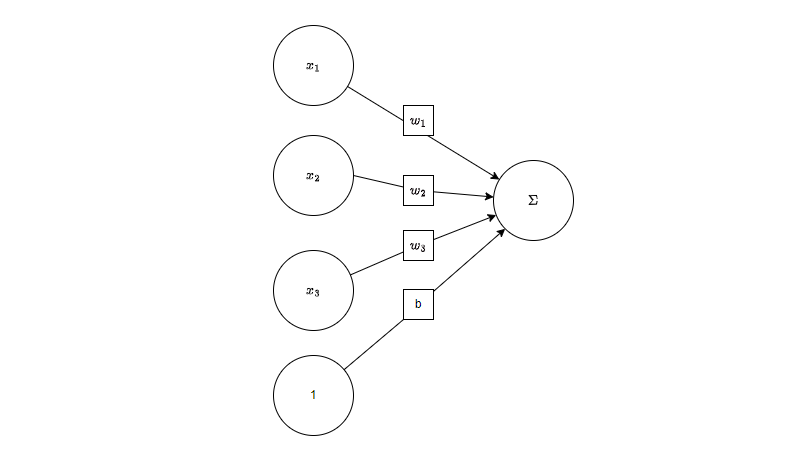

In [ ]:
w = np.array([2, 3, 4])
b = 10
x = np.array([2, 3, 4])

sum = 0
for j in range(0, len(x)):
  sum += w[j]*x[j]
sum += b

sum

Можно $b$ закинуть в веса, нужно просто добавить ещё один признак в объект:

In [ ]:
w = np.array([2, 3, 4, 10])
x = np.array([2, 3, 4, 1])

sum = 0
for j in range(0, len(x)):
  sum += w[j]*x[j]

sum

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

---

![](./assets/smooth_nn_intro/meme.png)

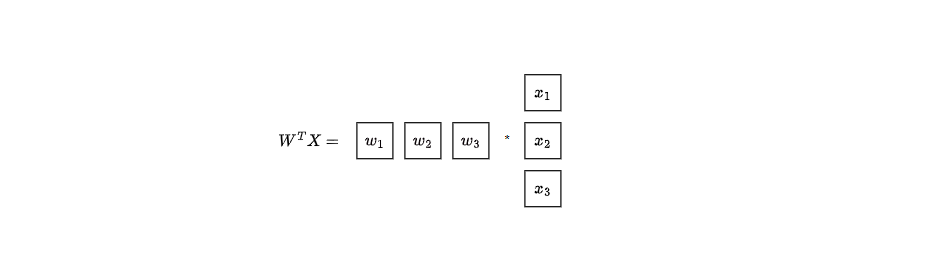

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

---

In [ ]:
w = np.array([2, 3, 4])
b = 10
x = np.array([2, 3, 4])

w.T.dot(x) + 10

In [ ]:
w = np.array([2, 3, 4, 10])
x = np.array([2, 3, 4, 1])

w.T.dot(x)

Вернёмся снова к функции потерь:

$$E(y, \hat{y})=\frac{1}{m}{\sum_{i=1}^{m}(y_i-\hat{y}_i)^2}$$

$$\hat{y}=w_1 x_1 + w_2 x_2 + \dots w_n x_n + b =  \langle w \; , \; x\rangle + b$$

Найдём градиент:

$$\nabla E = \left( \frac{\partial E}{\partial w_1}; \frac{\partial E}{\partial w_2}; \dots; \frac{\partial E}{\partial w_n}; \frac{\partial E}{\partial b} \right) $$

$$\frac{\partial E}{\partial w_1} =  \frac{2}{m}{\sum_{i=1}^{m}(y_i-\langle w \; , \; x\rangle-b)}*[-w_1]$$
$$\frac{\partial E}{\partial w_2} =  \frac{2}{m}{\sum_{i=1}^{m}(y_i-\langle w \; , \; x\rangle-b)}*[-w_2]$$
$$\dots$$
$$\frac{\partial E}{\partial w_n} =  \frac{2}{m}{\sum_{i=1}^{m}(y_i-\langle w \; , \; x\rangle-b)}*[-w_n]$$

$$\frac{\partial E}{\partial b} =  \frac{2}{m}{\sum_{i=1}^{m}(y_i-\langle w \; , \; x\rangle-b)}*[-1]$$

Если кажется, что можно посчитать $\frac{2}{m}{\sum_{i=1}^{m}(y_i-\langle w \; , \; x\rangle-b)}$ только один раз, то всё верно.

В итоге получаем умножение вектора на скаляр.

Реализуем:

In [ ]:
def t(y, w, x, b):
  y_pred = w.T.dot(x) - b
  return (y - y_pred).mean() * 2


x = np.array([
  [1, 2, 3],
  [2, 3, 4],
  [3, 4, 5]
])
y = np.array([13, 19, 25])

w = np.array([1, 2, 3])
b = 1

t(y, w, x, b)

In [ ]:
def dEdw(y, w, x, b):
  return t(y, w, x, b) * w

dEdw(y, w, x, b)

In [ ]:
def dEdw(y, w, x, b):
  return t(y, w, x, b) * w * (-1)

def dEdb(y, w, x, b):
  return t(y, w, x, b) * (-1)

In [ ]:
def E(y, w, x, b):
  y_pred = w.T.dot(x) - b
  return ((y - y_pred)**2).sum() / len(x)


In [ ]:
lmbd = 0.0001
# lmbd = 0.01
# lmbd = 0.1

num_iter = 20
eps = 0.1
# eps = 0.0000001


x = np.array([
  [1, 2, 3],
  [2, 3, 4],
  [3, 4, 5]
])
y = np.array([13, 19, 25])

w_0 = np.array([1.1, 2.1, 3.1])
b_0 = 1.1

w = {0: w_0}
b = {0: b_0}
for j in range(0, num_iter):
  w[j+1] = w[j] - lmbd * dEdw(y, w[j], x, b[j])
  b[j+1] = b[j] - lmbd * dEdb(y, w[j], x, b[j])
  # if math.fabs(x[j+1] - x[j]) <= eps:
  #   break

for j in w.keys():
  # print('k_{}={:6.2f} \t b_{}={:6.2f}'.format(j, k[j], j, b[j]))
  print(f'{w[j]} {b[j]} E={E(y, w[j], x, b[j])}')

# Часть 5. Пример 4: Логистическая регрессия в случае бинарной классификации

Идея логистической регрессии в случае бинарной классификации очень похожа на идею предыдущих методов. Но теперь на выходе из модели требуется получить не  $\hat{y} \in \mathbb{R}$, а $\hat{y} \in [0,\, 1]$, где 0 и 1 -- метки классов.

Для отображения ответа линейной регрессии в $ [0,\, 1]$ используется логистическая функция, а именно сигмоидная:
$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

Отобразим её на графике:

In [ ]:
def sigma(x):
  return 1 / (1 + math.exp(-x))

x = np.linspace(-10, 10, 100)
y = list(map(sigma, x))

plt.plot(x, y, color='blue')

plt.show()

Граф вычисления модели приобретает следующий вид:

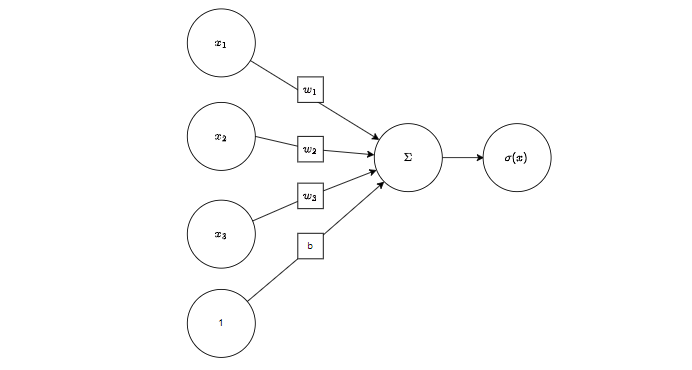

Уже большеват. А ещё нужно и функцию потерь посчитать. Градиенты считать всё труднее. Здесь и приходит на помощь **алгоритм обратного распространения ошибки** (Backpropagation).

## Когда классов > 2

todo: ещё плавнее

https://viewer.diagrams.net/?tags=%7B%7D&highlight=0000ff&edit=_blank&layers=1&nav=1&title=NN.drawio#Uhttps%3A%2F%2Fdrive.google.com%2Fuc%3Fid%3D1KKLCVtgt9VzP0OmPiHU1I97FGPiK8xSu%26export%3Ddownload

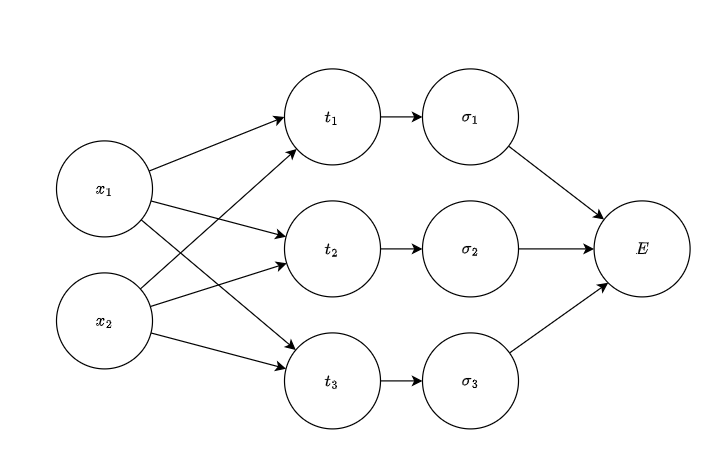

# Часть 6. Backprop.

Выше мы уже применяли выше цепное правило (chain rule) для дифференцирования сложной функции. Идея простая:

$$y=y(g(x)),$$ 
производная: 
$${\frac{dy}{dx}}={\frac{dy}{dg}}{\frac{dg}{dx}}$$

Каждый компонент использует значения частных производных функции потерь по своему выходу для непосредственного вычисления частных производных функции потерь по $W$ и $b$, а также передает предыдущему компоненту вычисленные значения производной функии потерь по своему входу. Далее компонент с использованием оптимизатора делает шаг градиентного спуска (обновляются значения весов $W$ и $b$). Обновление весов выполняется ПОСЛЕ вычисления частных производных по весам.

Давайте представим весь граф вычислений в виде композиции функций:

$$E(y, \sigma(t(x))),$$ 
где
$$t(x) = W^T ⋅ x + b$$

Градиент по весам:

$${\frac{dE}{dw}}={\frac{dE}{d\sigma}}{\frac{d\sigma}{dt}}{\frac{dt}{dw}}$$

Градиент по смещению:

$${\frac{dE}{db}}={\frac{dE}{d\sigma}}{\frac{d\sigma}{dt}}{\frac{dt}{db}}$$


## Разбираемся как считать.

Пусть дано ${\frac{dE}{d\sigma}}$, тогда мы сможем посчитать ${\frac{dE}{dt}}$. Тогда сможем посчитать:
- ${\frac{dE}{dw}}$
- ${\frac{dE}{db}}$
- ${\frac{dE}{dx}}$

---

## Считаем ${\frac{dE}{dt}}$

$$ \frac{dE}{dt_1} = \frac{dE}{d\sigma_1} \frac{d\sigma_1}{dt_1} = \frac{dE}{d\sigma_1} \sigma'(t_1)
 $$

$$ \frac{dE}{dt_2} = \frac{dE}{d\sigma_2} \frac{d\sigma_2}{dt_2} = \frac{dE}{d\sigma_2} \sigma'(t_2)
 $$

$$ \frac{dE}{dt_3} = \frac{dE}{d\sigma_3} \frac{d\sigma_3}{dt_3} = \frac{dE}{d\sigma_3} \sigma'(t_3)
 $$

В итоге:

$$ \frac{dE}{d\sigma} =\{ \frac{dE}{d\sigma_1},\frac{dE}{d\sigma_2},
\frac{dE}{d\sigma_3} \}
 $$

$$\sigma'(t) = [\sigma'(t_1), \sigma'(t_2), \sigma'(t_3)]$$

$$\frac{dE}{dt} = \frac{dE}{d\sigma} \odot \sigma'(t)$$

${\frac{dE}{dt}}$ есть.

---

## Считаем $\frac{dE}{dW}$

$$\frac{dE}{dw_{11}} = \frac{dE}{dt_{1}}
 \frac{dt_1}{dw_{11}} = \frac{dE}{dt_{1}}x_1
$$

$$\frac{dE}{dw_{21}} = \frac{dE}{dt_{1}}
 \frac{dt_1}{dw_{21}} = \frac{dE}{dt_{1}}x_2
$$

$$\frac{dE}{dw_{12}} = \frac{dE}{dt_{2}}
 \frac{dt_2}{dw_{12}} = \frac{dE}{dt_{2}}x_1
$$

В итоге:

$$\frac{dE}{dW}  = X^T · \frac{dE}{dt}$$

---

## Считаем $\frac{dE}{db}$

$$\frac{dE}{db_{1}} = \frac{dE}{dt_{1}}
 \frac{dt_1}{db_{1}} = \frac{dE}{dt_{1}} * 1
$$

В итоге:

$$\frac{dE}{db} = \frac{dE}{dt}$$

---

## Считаем $\frac{dE}{dx}$

$$\frac{dE}{dx_1}  =\frac{dE}{dt_1} \frac{dt_1}{dx_1} + \frac{dE}{dt_2} \frac{dt_2}{dx_1} + \frac{dE}{dt_3}\frac{dt_3}{dx_1} = \frac{dE}{dt_1} w_{11} + \frac{dE}{dt_2} w_{12} + \frac{dE}{dt_3}w_{13}
 $$

В итоге:

$$\frac{dE}{dx}  = \frac{dE}{dt} W^T$$

А что с функцией потерь в классификации?

MSE может быть использована, но по ряду причин совсем не подходит для решения задачи классификации.

todo: расписать.

Короткий ответ от коллеги с приятным акцентом: https://www.youtube.com/watch?v=bNwI3IUOKyg

При решении задач классификации (в общем случае, когда количество классов больше двух), как правило, применяется функция потерь перекрестная энтропия (при бинарной классификации применяется ее частный случай - бинарная перекрестная кросэнтропия).

Общий случай: $E = -\sum_{k}^{s}{{y_k}ln{\hat{y_k}}}$. Здесь s - количество классов. При использовании такой функции потерь, предполагается, что целевой признак размечен (например, для случая двух классов) как [1, 0]. Это оначает, что объект относится к 0 классу. Предположим, модель предсказала ответ [0,36, 0,64]. Она ошиблась. Можно посчитать значение перекрестной энтропии и обновить веса.

Как вы видите, использование перекрестной энтропии требует, чтобы сумма значений нейронов была единица и все числа были положительными. Для получения такого результата на произвольном слое с нейронами используется функция softmax.

SoftMax:
$$S(x)_i = \frac{e^{x_i}}{\displaystyle\sum_{k \mathop =1}^K e^{x_k}},$$ 
где $i$ -- номер класса.

$$E = CE(y, \hat{y}) =  -\sum_{i} y_{i}\ln(\hat{y}_i)
  = -\sum_{i} y_{i}\hat{y}_i + \ln \sum_j e^{\hat{y}} $$

$$ \frac{dE}{dx_k}  = -y_k + \frac{1}{\sum_j e^{x_j}
} e^{x_k} = S(x)_k - y_k $$

$$ \frac{dE}{dh}  = S(x) - y $$

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;

&nbsp;



![](https://images.squarespace-cdn.com/content/v1/551e1babe4b0aa77af01e45f/1462484387144-SR29J02ZZYCMS9N8D71J/image-asset.jpeg?format=1500w)